In [1]:
import csv
import cPickle
import numpy as np
import matplotlib.pyplot as plt

from functions import *

from sklearn.decomposition import PCA
from person import Person
from place import Place
from sklearn.cluster import KMeans

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
area_name = ["blue","pink","red","yellow","green"]
MAP = load_pkl("positions.pkl")
areaMAP = load_pkl("area.pkl")

In [3]:
visitors = {}
with open("data/park-movement-Fri-FIXED-2.0.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    counter = 0
    for row in reader:
        ID = row["id"]
        time = row['Timestamp']
        if ID in visitors:
            visitors[ID].add(row)
        else:
            visitors[ID] = Person(row)
        counter += 1
        if counter%100000==0:
            print counter
            print "The number of visitors is %d" % (len(visitors),)

100000
The number of visitors is 1421
200000
The number of visitors is 2365
300000
The number of visitors is 2997
400000
The number of visitors is 3235
500000
The number of visitors is 3249
600000
The number of visitors is 3275
700000
The number of visitors is 3369
800000
The number of visitors is 3437
900000
The number of visitors is 3456
1000000
The number of visitors is 3456
1100000
The number of visitors is 3456
1200000
The number of visitors is 3456
1300000
The number of visitors is 3456
1400000
The number of visitors is 3456
1500000
The number of visitors is 3456
1600000
The number of visitors is 3456
1700000
The number of visitors is 3456
1800000
The number of visitors is 3456
1900000
The number of visitors is 3456
2000000
The number of visitors is 3456
2100000
The number of visitors is 3456
2200000
The number of visitors is 3456
2300000
The number of visitors is 3456
2400000
The number of visitors is 3463
2500000
The number of visitors is 3468
2600000
The number of visitors is 

In [4]:
extract_visitors_features(visitors, MAP, areaMAP)

500
1000
1500
2000
2500
3000
3500


In [5]:
toPCA, IDlist = aggregate_visitors_data(visitors)

In [6]:
X_r, kmeans = doPCA(toPCA)

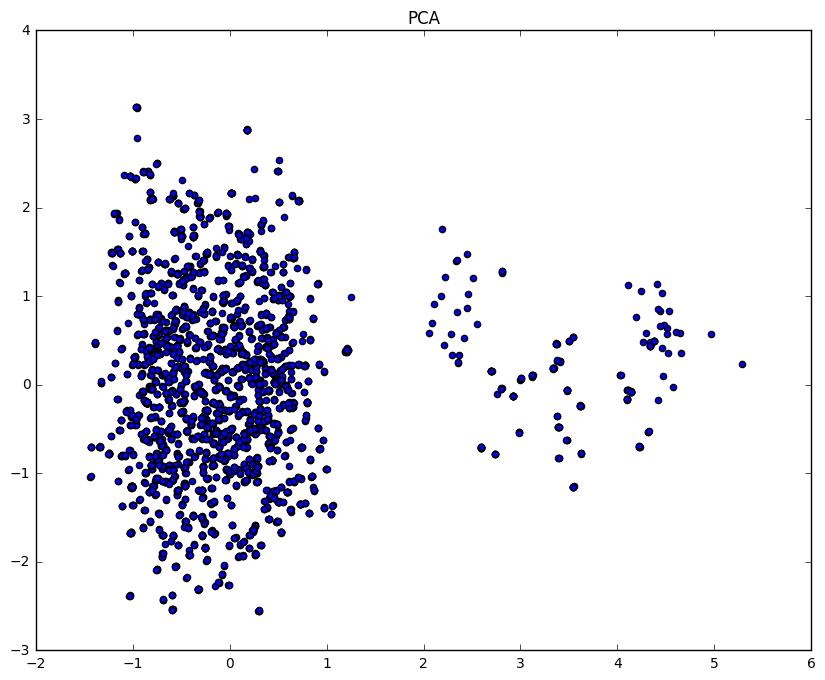

In [7]:
plot_PCA(X_r)

In [12]:
dx = 0.1
width = 8
height = 7
slot = np.zeros((int(width/dx),int(height/dx)),dtype=np.int)
for i in range(len(IDlist)):
    X = X_r[i,0]
    Y = X_r[i,1]
    x = int((X+2)/dx)
    y = int((Y+3)/dx)
    if slot[x,y]==0:
        slot[x,y] = IDlist[i]

In [21]:
reduced_IDlist = []
for i in range(slot.shape[0]):
    for j in range(slot.shape[1]):
        if slot[i,j]!=0:
            reduced_IDlist.append(str(slot[i,j]))

In [22]:
toPCA = np.zeros((0,78))
IDlist = []
for ID in reduced_IDlist:
    visitor = visitors[ID]
    aggregated = visitor.aggregate_data()
    toPCA = np.append(toPCA, aggregated, axis=0)
    IDlist.append(int(ID))

In [23]:
X_r, kmeans = doPCA(toPCA)

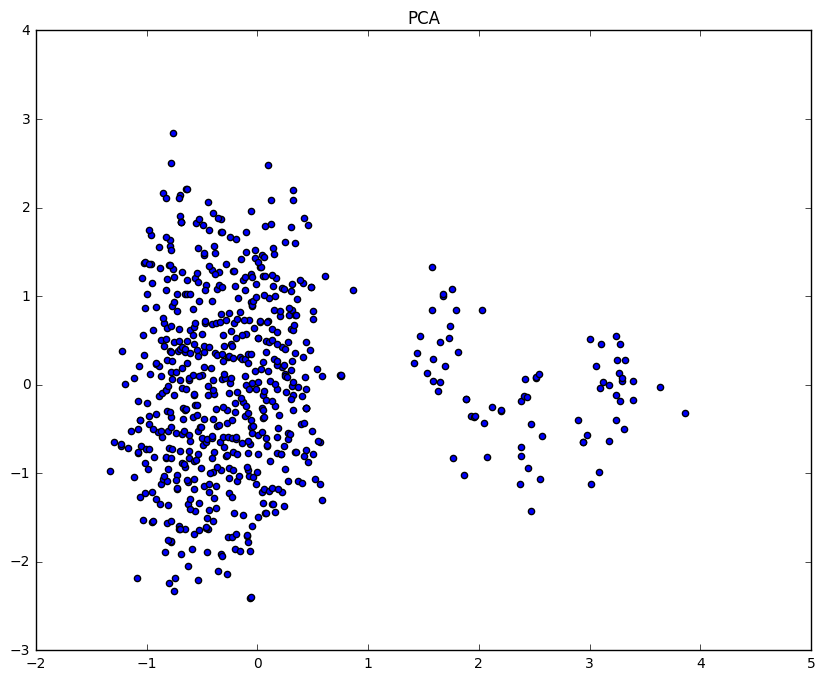

In [24]:
plot_PCA(X_r)

In [25]:
X_r.shape

(658, 2)

In [26]:
IDs = reduced_IDlist

In [35]:
minimumIDs = []
for i in range(len(reduced_IDlist)):
    if X_r[i,0]>1 or X_r[i,0]<-1.2 or X_r[i,1]>2.4 or X_r[i,1]<-2:
        minimumIDs.append(str(IDlist[i]))

In [37]:
routes = np.zeros((0,7),dtype=np.int)
counter = 0
for ID in minimumIDs:
    counter += 1
    if counter%100==0:
        print counter
    route = visitors[ID].route()
    routes = np.append(routes,route,axis=0)

In [38]:
routes.shape

(108269, 7)

In [40]:
output_features(toPCA)